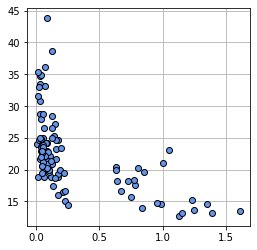

In [4]:
#　オリジナルモデル
import numpy as npy
import matplotlib.pyplot as plt
from scipy.optimize import minimize
%matplotlib inline

#ボストン住宅価格データセットの読み込み
from sklearn.datasets import load_boston

boston = load_boston()
#説明変数
X_array = boston.data
#目的変数
y_array = boston.target

X = npy.array([X_array[:,0][0:100]])
Y = y_array[0:100]
xline = X[0]
yline = Y

plt.figure(figsize=(4,4))

plt.plot(xline,yline,marker='o',linestyle='None',markeredgecolor='black',color='cornflowerblue')
plt.grid(True)
mse = mse_model_func(W, xline, yline)

plt.show()


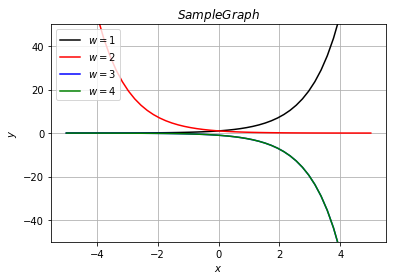

In [11]:
# ライブラリのインポート
import numpy as npy
import matplotlib.pyplot as plt
# Jupiter Notebookで結果を表示するためのおまじない
%matplotlib inline
# 関数の定義
def f1(x):
    return npy.exp(x)

def f2(x):
    return npy.exp(-x)

def f3(x):
    return -npy.exp(x)

def f4(x):
    return -npy.exp(x)

# X軸に0から9までの配列
xline = npy.linspace(-5,5,50)
yline1 = f1(xline)
yline2 = f2(xline)
yline3 = f3(xline)
yline4 = f4(xline)

# pltに要素を設定する
plt.plot(xline, yline1, color ='black', label='$w=1$')
plt.plot(xline, yline2, color ='red', label='$w=2$')
plt.plot(xline, yline3, color ='blue', label='$w=3$')
plt.plot(xline, yline4, color ='green', label='$w=4$')

# 凡例を表示する
plt.legend(loc="upper left")
# y軸の表示範囲を設定する
plt. ylim(- 50, 50)
# タイトルを表示する
plt.title('$SampleGraph$')
# X軸に名前を付ける
plt.xlabel('$x$')
# Y軸に名前を付ける
plt.ylabel('$y$')
# グリッドを表示する
plt.grid(True)

# グラフを描写する
plt.show()

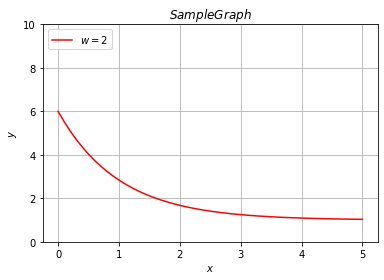

In [16]:
# ライブラリのインポート
import numpy as npy
import matplotlib.pyplot as plt
# Jupiter Notebookで結果を表示するためのおまじない
%matplotlib inline
# 関数の定義

def f2(x):
    return 1 + 5*npy.exp(-x)


# X軸に0から9までの配列
xline = npy.linspace(0,5,50)
yline2 = f2(xline)

# pltに要素を設定する
plt.plot(xline, yline2, color ='red', label='$w=2$')


# 凡例を表示する
plt.legend(loc="upper left")
# y軸の表示範囲を設定する
plt. ylim(0, 10)
# タイトルを表示する
plt.title('$SampleGraph$')
# X軸に名前を付ける
plt.xlabel('$x$')
# Y軸に名前を付ける
plt.ylabel('$y$')
# グリッドを表示する
plt.grid(True)

# グラフを描写する
plt.show()

w0=16.4, w1=12.0,w2=5.6
SD=4.62cm


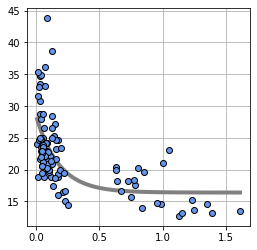

In [2]:
#　オリジナルモデル
import numpy as npy
import matplotlib.pyplot as plt
from scipy.optimize import minimize
%matplotlib inline

#ボストン住宅価格データセットの読み込み
from sklearn.datasets import load_boston

# モデル関数
def model_func(x, w):
    y = w[0] + w[1] * npy.exp(-w[2]*x)
    return y

# モデルのグラフ表示
def show_model_func(w):
    xb = npy.linspace(X_min, X_max, 100)
    y = model_func(xb, w)
    plt.plot(xb, y, c=[.5, .5, .5],lw=4)

# MSEの導出
def mse_model_func(w, x, t):
    y = model_func(x, w)
    mse = npy.mean((y - t)**2)
    return mse

# 最適化パラメータの導出
def fit_model_func(w_init, x, t):
    result = minimize(mse_model_func, w_init, args=(x,t),method="powell")
    return result['x']

boston = load_boston()
#説明変数
X_array = boston.data
#目的変数
y_array = boston.target

X = npy.array([X_array[:,0][0:100]])
Y = y_array[0:100]
xline = X[0]
yline = Y

X_min = min(xline)
X_max = max(xline)

plt.figure(figsize=(4,4))
W_init=[10, 1 ,0]
W = fit_model_func(W_init, xline, yline)
print("w0={0:.1f}, w1={1:.1f},w2={2:.1f}".format(W[0],W[1],W[2]))

show_model_func(W)
plt.plot(xline,yline,marker='o',linestyle='None',markeredgecolor='black',color='cornflowerblue')
plt.grid(True)
mse = mse_model_func(W, xline, yline)
print("SD={0:.2f}cm".format(npy.sqrt(mse)))
plt.show()


In [24]:
#　オリジナルモデル
import numpy as npy
import matplotlib.pyplot as plt
from scipy.optimize import minimize
%matplotlib inline

#ボストン住宅価格データセットの読み込み
from sklearn.datasets import load_boston

# モデル関数
def model_func(x, w):
    y = w[0] + w[1] * npy.exp(-w[2]*x)
    return y

# モデルのグラフ表示
def show_model_func(w):
    xb = npy.linspace(X_min, X_max, 100)
    y = model_func(xb, w)
    plt.plot(xb, y, c=[.5, .5, .5],lw=4)

# MSEの導出
def mse_model_func(w, x, t):
    y = model_func(x, w)
    mse = npy.mean((y - t)**2)
    return mse

# 最適化パラメータの導出
def fit_model_func(w_init, x, t):
    result = minimize(mse_model_func, w_init, args=(x,t),method="powell")
    return result['x']

def kfold_model_func(x, t, k):
    n = len(x)
    mse_train = npy.zeros(k)
    mse_test = npy.zeros(k)
    for i in range(0,k):
        x_train = x[npy.fmod(range(n), k) != i]
        t_train = t[npy.fmod(range(n), k) != i]
        x_test = x[npy.fmod(range(n), k) == i]
        t_test = t[npy.fmod(range(n), k) == i]
        wm = fit_model_func(npy.array([16.4, 12.0, 5.6]), x_train, t_train)
        mse_train[i] = mse_model_func(wm, x_train, t_train)
        mse_test[i] = mse_model_func(wm, x_test, t_test)
    return mse_train, mse_test



boston = load_boston()
#説明変数
X_array = boston.data
#目的変数
y_array = boston.target

X = npy.array([X_array[:,0][0:100]])
Y = y_array[0:100]
xline = X[0]
yline = Y

X_min = min(xline)
X_max = max(xline)

plt.figure(figsize=(4,4))
W_init=[10, 1 ,0]
W = fit_model_func(W_init, xline, yline)

K = 16
Cv_func_train, Cv_func_test = kfold_model_func(xline, yline, K)
mean_func_test = npy.sqrt(npy.mean(Cv_func_test))
print("SD={0:2f}cm".format(mean_func_test))



SD=4.636009cm


<Figure size 288x288 with 0 Axes>